Image dimensions: (211, 240, 256)
Image spacing: (1.0, 1.0, 1.0)


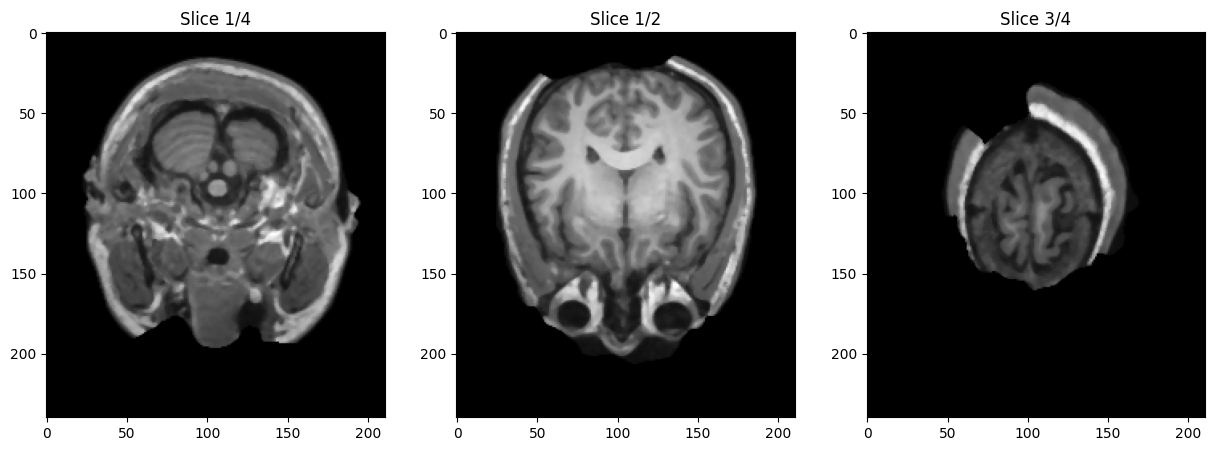

In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Load the NIfTI image
image = sitk.ReadImage('sub-01_ses-2015_T1w.nii')

# Convert to a NumPy array for further processing
image_array = sitk.GetArrayFromImage(image)

# Print image dimensions
print(f"Image dimensions: {image.GetSize()}")
print(f"Image spacing: {image.GetSpacing()}")

# Display multiple image slices (for 3D images)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_array[image_array.shape[0] // 4], cmap='gray')
axes[0].set_title('Slice 1/4')
axes[1].imshow(image_array[image_array.shape[0] // 2], cmap='gray')
axes[1].set_title('Slice 1/2')
axes[2].imshow(image_array[3 * image_array.shape[0] // 4], cmap='gray')
axes[2].set_title('Slice 3/4')
plt.show()


In [2]:
import SimpleITK as sitk
import numpy as np

def extract_statistics(image):
    image = sitk.Cast(image, sitk.sitkFloat32)
    image_array = sitk.GetArrayFromImage(image)
    min_intensity = np.min(image_array)
    max_intensity = np.max(image_array)
    mean_intensity = np.mean(image_array)
    median_intensity = np.median(image_array)
    std_dev_intensity = np.std(image_array)
    return {'min': min_intensity, 'max': max_intensity, 'mean': mean_intensity, 'median': median_intensity, 'std_dev': std_dev_intensity}

# Load the MRI image
image = sitk.ReadImage('sub-01_ses-2015_T1w.nii')

# Extract statistics from the image
stats = extract_statistics(image)
print(stats)


{'min': 0.0, 'max': 645.33344, 'mean': 59.514603, 'median': 0.0, 'std_dev': 103.467545}


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Use a more realistic dataset (replace with actual features and labels)
# Features array with multiple samples
X = np.random.rand(100, 10)  # Example feature vector with 100 samples and 10 features
y = np.random.randint(0, 2, 100)  # Example binary labels (0 or 1) for classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a simple classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print feature importances if using a model that supports it (e.g., RandomForestClassifier)
if hasattr(clf, 'feature_importances_'):
    print("Feature importances:", clf.feature_importances_)


              precision    recall  f1-score   support

           0       0.46      0.43      0.44        14
           1       0.33      0.36      0.35        11

    accuracy                           0.40        25
   macro avg       0.40      0.40      0.40        25
weighted avg       0.41      0.40      0.40        25

Feature importances: [0.08737354 0.09015808 0.08449003 0.09543215 0.12476025 0.13048891
 0.09678245 0.07340777 0.13026401 0.08684281]


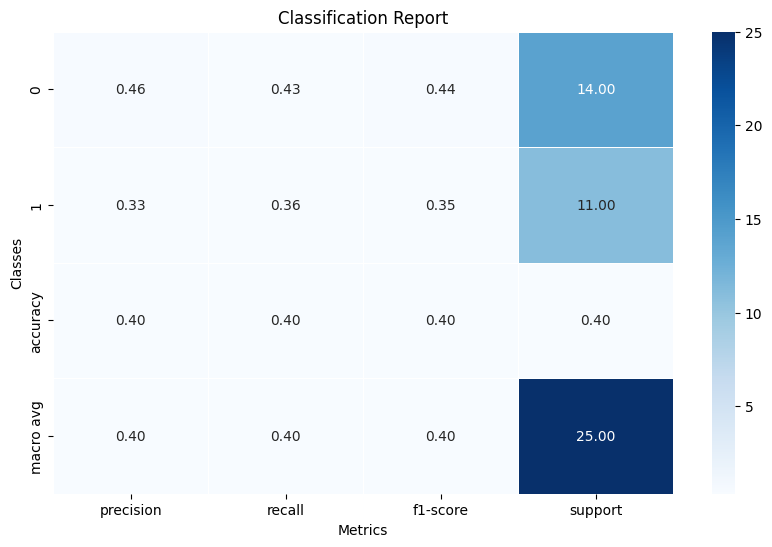

In [4]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume y_test and y_pred are your true and predicted labels
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame for easy visualization
report_df = pd.DataFrame(report).transpose()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap of the classification report
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='Blues', fmt='.2f', linewidths=.5)

# Add labels and title
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')

# Show the plot
plt.show()
